In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('iris.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [7]:
x = df.drop(columns=['species'])
y = df[['species']]

In [8]:
y.value_counts()

species   
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [9]:
x.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [11]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                           ('scaler',StandardScaler())]).set_output(transform='pandas')

In [12]:
x_pre = num_pipe.fit_transform(x)
x_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [21]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_pre, y, 
                                                test_size=0.33,
                                                random_state=42)

In [22]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
96,-0.173674,-0.362176,0.251221,0.132510
105,2.128516,-0.131979,1.615320,1.185567
66,-0.294842,-0.131979,0.421734,0.395774
0,-0.900681,1.019004,-1.340227,-1.315444
122,2.249683,-0.592373,1.672157,1.053935


In [26]:
ytrain.head()

,species
96,versicolor
105,virginica
66,versicolor
0,setosa
122,virginica


In [27]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
73,0.310998,-0.592373,0.535409,0.000878
18,-0.173674,1.709595,-1.169714,-1.183812
118,2.249683,-1.052767,1.785832,1.448832
78,0.189830,-0.362176,0.421734,0.395774
76,1.159173,-0.592373,0.592246,0.264142


In [17]:
ytest.head()

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor


In [24]:
xtrain.shape

(100, 4)

In [25]:
xtest.shape

(50, 4)

In [28]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=1,
                               min_samples_split=5,
                               min_samples_leaf=5,
                               criterion='gini')
model.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=5, min_samples_split=5)

In [29]:
model.score(xtrain, ytrain)

0.66

In [30]:
model.score(xtest, ytest)

0.68

In [31]:
params = {'max_depth':[1,2,3,4,5],
          'min_samples_split':[3,4,5,6,7],
          'min_samples_leaf':[5,6,7,8,9],
          'criterion':['gini', 'entropy']}

In [32]:
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier()
gscv = GridSearchCV(dtc, param_grid=params, cv=5, scoring='f1_macro')
gscv.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [5, 6, 7, 8, 9],
                         'min_samples_split': [3, 4, 5, 6, 7]},
             scoring='f1_macro')

In [33]:
gscv.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 3}

In [34]:
gscv.best_score_

0.9223826173826174

In [35]:
best_dtc = gscv.best_estimator_
best_dtc

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=3)

In [36]:
best_dtc.score(xtrain, ytrain)

0.96

In [37]:
best_dtc.score(xtest, ytest)

1.0

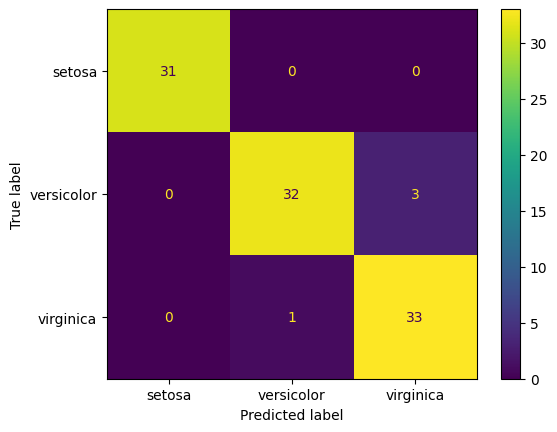

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_dtc, xtrain, ytrain)

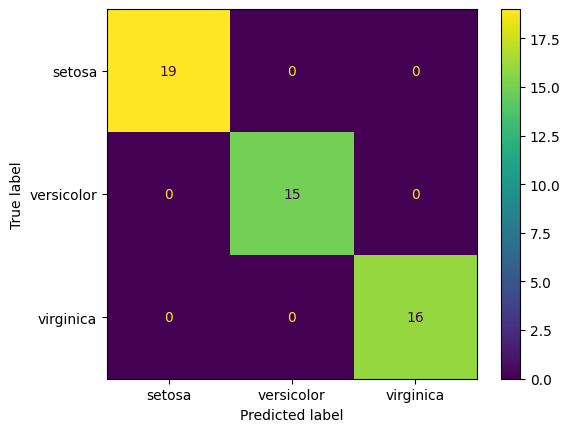

In [39]:
ConfusionMatrixDisplay.from_estimator(best_dtc, xtest, ytest)

In [40]:
ypred_train = best_dtc.predict(xtrain)
ypred_test = best_dtc.predict(xtest)

In [41]:
ypred_train[0:5]

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica'],
      dtype=object)

In [42]:
ytrain.head()

,species
96,versicolor
105,virginica
66,versicolor
0,setosa
122,virginica


In [43]:
ypred_test[0:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

In [44]:
ytest.head()

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor


In [45]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [46]:
from sklearn.model_selection import cross_val_score
scores_f1 = cross_val_score(best_dtc, xtrain, ytrain, cv=5, scoring='f1_macro')

In [47]:
scores_f1.mean()

0.9223826173826174

In [48]:
scores_recall = cross_val_score(best_dtc, xtrain, ytrain,
                                cv=5, scoring='recall_macro')
scores_recall

array([1.        , 0.80952381, 0.9047619 , 0.95238095, 0.94444444])

In [49]:
scores_recall.mean()

0.9222222222222223

In [50]:
scores_precision = cross_val_score(best_dtc, xtrain, ytrain,
                                   cv=5, scoring='precision_macro')
scores_precision

array([1.        , 0.80952381, 0.92592593, 0.95833333, 0.95833333])

In [51]:
scores_precision.mean()

0.9304232804232806